In [25]:
import pandas as pd
import scipy as spy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401  # ensures 3D is registered
import sympy as sp


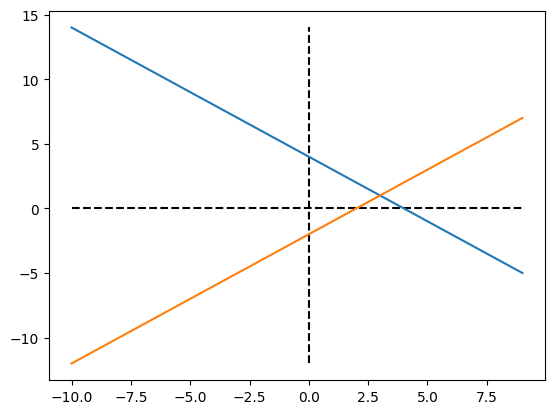

In [15]:
import pandas as pd
import scipy as spy
import numpy as npy
import matplotlib.pyplot as plt

x=[i for i in range(-10,10)]
y=[4-i for i in x]
r=x
w=[((2*i)-4)/2 for i in r]

plt.plot([min(x),max(x)],[0,0], 'k--')
plt.plot([0,0],[min(min(y),min(w)),max(max(y), max(w))], 'k--')

plt.plot(x,y)
plt.plot(r,w)
plt.show()

A=npy.array([[1,2],[1,-2]])
b=npy.array([4,4])

x=npy.linalg.solve(A,b)

### Vector Space

[0.4 0.2 2.3 1.5]
[25.   72.25]


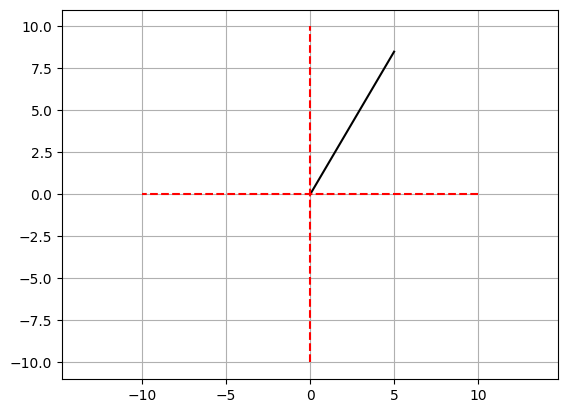

In [17]:
v= [5,8.5]
u= npy.transpose(v)

v_2= npy.array([0.4,0.2,2.3,1.5])

print(v_2.T)

print(v*u)


plt.plot([0,v[0]],[0,v[1]], 'k-')
plt.axis('equal')
plt.plot([10,-10],[0,0], 'r--')
plt.plot([0,0],[-10,10], 'r--')
plt.grid()

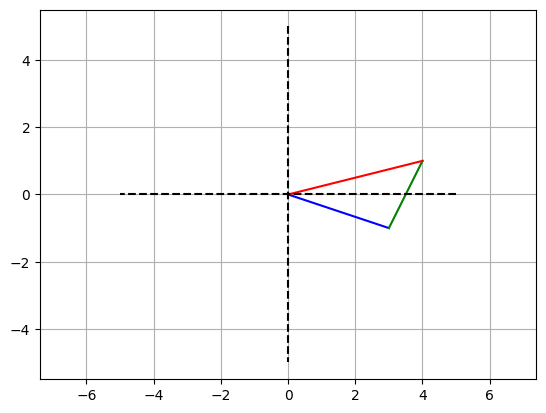

In [5]:
v1= npy.array([3,-1])
v2= npy.array([1,2])

v3=v1+v2

plt.plot([0,v1[0]],[0,v1[1]], 'b-')
plt.plot([0,v2[0]]+v1[0],[0,v2[1]]+v1[1], 'g-')
plt.plot([0,v3[0]],[0,v3[1]], 'r-')
plt.axis('equal')
plt.grid()
plt.plot([5,-5],[0,0],'k--')
plt.plot([0,0],[5,-5],'k--')
plt.show()

## Function Evaluator

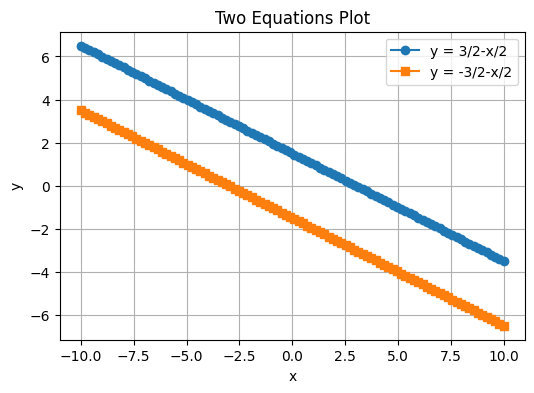

In [18]:

def plot_equation(equation: str, x_points):
    """
    Plot a mathematical equation for given x_points.

    Parameters:
        equation (str): Equation as a string (e.g., "x**2 + 3*x + 2").
        x_points (array-like): List or numpy array of x values.

    Returns:
        y_points (numpy.ndarray): Computed y values.
    """
    x = np.array(x_points, dtype=float)

    # Allow only numpy functions/constants and 'x'
    allowed_names = {name: getattr(np, name) for name in dir(np) if not name.startswith("_")}
    allowed_names["x"] = x

    # Evaluate the equation in a restricted environment
    y = eval(equation, {"__builtins__": {}}, allowed_names)

    return y


def plot_two_equations(eq1: str, eq2: str, x_points):
    """
    Plot two mathematical equations on the same figure.

    Parameters:
        eq1 (str): First equation as a string.
        eq2 (str): Second equation as a string.
        x_points (array-like): X values for both equations.
    """
    # Calculate y values using the first function
    y1 = plot_equation(eq1, x_points)
    y2 = plot_equation(eq2, x_points)

    x = np.array(x_points, dtype=float)

    # Plot both lines together
    plt.figure(figsize=(6, 4))
    plt.plot(x, y1, marker='o', label=f"y = {eq1}")
    plt.plot(x, y2, marker='s', label=f"y = {eq2}")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Two Equations Plot")
    plt.grid(True)
    plt.legend()
    plt.show()


# Example usage
x_vals = np.linspace(-10, 10, 100)
plot_two_equations("3/2-x/2", "-3/2-x/2", x_vals)


<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in sqrt
  return -sqrt(9 - 2*x**2)
<lambdifygenerated-7>:2: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(9 - 2*x**2)
/var/folders/6_/4v4px4w941x057x3xr2z3sb00000gn/T/ipykernel_1707/1384455650.py:172: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


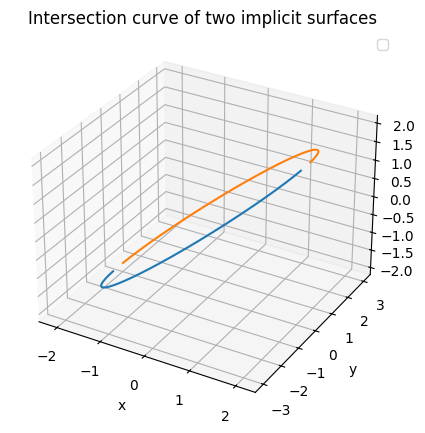

In [27]:

def plot_intersection_curve(eq1: str,
                            eq2: str,
                            param_var: str = "x",
                            t_min: float = -5.0,
                            t_max: float = 5.0,
                            samples: int = 200,
                            numeric_guess: tuple[float, float] | None = None):
    """
    Plot the 3D intersection curve defined by two implicit equations in R^3:
      f(x,y,z) = 0  and  g(x,y,z) = 0

    Parameters
    ----------
    eq1, eq2 : str
        Equations in x,y,z written as expressions equal to zero (e.g., "x**2+y**2+z**2-9").
    param_var : {"x","y","z"}
        Variable to use as the parameter for tracing the curve (default "x").
    t_min, t_max : float
        Parameter range.
    samples : int
        Number of parameter samples.
    numeric_guess : tuple(float, float) or None
        Initial guess for the two unknowns when using numerical tracing
        (e.g., if param_var="x", guess is for (y,z)). If None, uses (0,0).

    Returns
    -------
    XYZ : np.ndarray, shape (N, 3)
        The sampled points on the intersection curve.
    """

    # --- Symbols and parsing ---
    x, y, z = sp.symbols("x y z", real=True)
    sym_map = {"x": x, "y": y, "z": z}
    f = sp.sympify(eq1, locals=sym_map | vars(sp))
    g = sp.sympify(eq2, locals=sym_map | vars(sp))

    # Decide which two variables to solve for based on the chosen parameter
    if param_var == "x":
        param_sym, unk_syms = x, (y, z)
    elif param_var == "y":
        param_sym, unk_syms = y, (x, z)
    elif param_var == "z":
        param_sym, unk_syms = z, (x, y)
    else:
        raise ValueError("param_var must be one of 'x', 'y', or 'z'.")

    # Try symbolic solve first
    sol = None
    try:
        sols = sp.solve([sp.Eq(f, 0), sp.Eq(g, 0)], list(unk_syms), dict=True)
        # Keep solutions that depend only on the parameter (may be multiple branches)
        branches = []
        for s in sols:
            expr1 = sp.simplify(s[unk_syms[0]])
            expr2 = sp.simplify(s[unk_syms[1]])
            # Accept if expressions are functions of param_sym only (no other symbols)
            if expr1.free_symbols.issubset({param_sym}) and expr2.free_symbols.issubset({param_sym}):
                branches.append((expr1, expr2))
        if branches:
            sol = branches  # one or multiple analytic branches
    except Exception:
        pass  # Fall back to numeric tracing

    t_vals = np.linspace(t_min, t_max, samples)
    curves = []  # list of arrays shape (N,3) for each branch

    if sol is not None:
        # Symbolic: sample each branch
        for expr_a, expr_b in sol:
            fa = sp.lambdify(param_sym, expr_a, "numpy")
            fb = sp.lambdify(param_sym, expr_b, "numpy")

            if param_var == "x":
                X = t_vals
                A = fa(t_vals)  # y
                B = fb(t_vals)  # z
                XYZ = np.column_stack([X, A, B])
            elif param_var == "y":
                Y = t_vals
                A = fa(t_vals)  # x
                B = fb(t_vals)  # z
                XYZ = np.column_stack([A, Y, B])
            else:  # param_var == "z"
                Z = t_vals
                A = fa(t_vals)  # x
                B = fb(t_vals)  # y
                XYZ = np.column_stack([A, B, Z])
            curves.append(XYZ)
    else:
        # Numeric tracing with nsolve: march along parameter and use previous solution as next initial guess
        if numeric_guess is None:
            numeric_guess = (0.0, 0.0)

        XYZ_pts = []
        guess = sp.Matrix(numeric_guess)

        # Build vector functions F(unknowns; t) = 0
        if param_var == "x":
            F = sp.Matrix([f.subs(x, param_sym), g.subs(x, param_sym)])
            unk_vec = sp.Matrix([y, z])
        elif param_var == "y":
            F = sp.Matrix([f.subs(y, param_sym), g.subs(y, param_sym)])
            unk_vec = sp.Matrix([x, z])
        else:
            F = sp.Matrix([f.subs(z, param_sym), g.subs(z, param_sym)])
            unk_vec = sp.Matrix([x, y])

        for t in t_vals:
            try:
                # nsolve expects concrete expressions in the unknowns
                Fn = [Fi.subs(param_sym, float(t)) for Fi in F]
                sol_vec = sp.nsolve(Fn, list(unk_vec), list(guess), tol=1e-12, maxsteps=100)
                guess = sol_vec  # warm-start next step
                sol_a, sol_b = float(sol_vec[0]), float(sol_vec[1])

                if param_var == "x":
                    XYZ_pts.append([t, sol_a, sol_b])
                elif param_var == "y":
                    XYZ_pts.append([sol_a, t, sol_b])
                else:  # "z"
                    XYZ_pts.append([sol_a, sol_b, t])

            except (sp.nsolve.NumericalError, ValueError):
                # If a step fails (discontinuity/branch), try resetting guess once
                try:
                    alt_guess = (0.0, 0.0)
                    Fn = [Fi.subs(param_sym, float(t)) for Fi in F]
                    sol_vec = sp.nsolve(Fn, list(unk_vec), list(alt_guess), tol=1e-12, maxsteps=100)
                    guess = sol_vec
                    sol_a, sol_b = float(sol_vec[0]), float(sol_vec[1])
                    if param_var == "x":
                        XYZ_pts.append([t, sol_a, sol_b])
                    elif param_var == "y":
                        XYZ_pts.append([sol_a, t, sol_b])
                    else:
                        XYZ_pts.append([sol_a, sol_b, t])
                except Exception:
                    # skip this t (gap)
                    XYZ_pts.append([np.nan, np.nan, np.nan])

        curves.append(np.array(XYZ_pts))

    # --- Plot ---
    fig = plt.figure(figsize=(7, 5))
    ax = fig.add_subplot(111, projection="3d")

    for i, XYZ in enumerate(curves, start=1):
        # Clean NaN gaps for plotting continuity
        XYZ = np.asarray(XYZ, dtype=float)
        # Split into continuous segments where rows are not NaN
        mask = ~np.isnan(XYZ).any(axis=1)
        if mask.all():
            ax.plot(XYZ[:,0], XYZ[:,1], XYZ[:,2], label=f"branch {i}")
        else:
            # plot segments separately
            start = None
            for idx, ok in enumerate(mask.tolist() + [False]):
                if ok and start is None:
                    start = idx
                elif not ok and start is not None:
                    seg = XYZ[start:idx]
                    if len(seg) > 1:
                        ax.plot(seg[:,0], seg[:,1], seg[:,2], label=f"branch {i}" if start == 0 else None)
                    start = None

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")
    ax.set_title("Intersection curve of two implicit surfaces")
    if len(curves) >= 1:
        ax.legend()
    plt.grid(True)
    plt.show()

    # If multiple branches, return the first by default plus all
    if len(curves) == 1:
        return curves[0]
    return curves


# Sphere of radius 3: x^2 + y^2 + z^2 = 9  -> "x**2 + y**2 + z**2 - 9"
# Plane z = x -> "z - x"
XYZ = plot_intersection_curve("x**2 + y**2 + z**2 - 9",
                              "z - x",
                              param_var="x",
                              t_min=-3, t_max=3, samples=400)
